# Pandas 심화: DataFrame & Series 완전 정복 가이드

## 📋 목차
1. [DataFrame 기초 조작](#1-dataframe-기초-조작)
2. [데이터 선택과 인덱싱](#2-데이터-선택과-인덱싱)
3. [Series 연산과 처리](#3-series-연산과-처리)
4. [DataFrame 행/열 추가](#4-dataframe-행열-추가)
5. [데이터 병합과 결합](#5-데이터-병합과-결합)
6. [실무 문제 해결](#6-실무-문제-해결)
7. [성능 최적화와 팁](#7-성능-최적화와-팁)

---

**🎯 학습 목표**
- Pandas DataFrame과 Series의 고급 조작법 마스터
- 실무에서 자주 사용되는 데이터 처리 패턴 학습
- 효율적인 데이터 분석 워크플로우 구축

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Pandas 표시 옵션 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📊 Pandas 버전:", pd.__version__)
print("🔢 NumPy 버전:", np.__version__)

📊 Pandas 버전: 2.3.1
🔢 NumPy 버전: 2.1.3


## 1. DataFrame 기초 조작

### 📊 실습용 학생 성적 데이터 생성

실무에서 자주 다루는 형태의 데이터를 만들어 다양한 조작법을 학습해보겠습니다.

In [2]:
# 학생 성적 데이터 생성
student_data = {
    'name': ['김철수', '이영희', '박민수', '최지영', '정현우'],
    'kor': [85, 92, 78, 95, 88],
    'math': [90, 85, 92, 88, 95],
    'eng': [88, 90, 85, 92, 87]
}

df = pd.DataFrame(student_data)

print("📚 학생 성적 데이터")
print("="*30)
print(df)
print(f"\n데이터 형태: {df.shape}")
print(f"컬럼: {list(df.columns)}")
print(f"인덱스: {list(df.index)}")

📚 학생 성적 데이터
  name  kor  math  eng
0  김철수   85    90   88
1  이영희   92    85   90
2  박민수   78    92   85
3  최지영   95    88   92
4  정현우   88    95   87

데이터 형태: (5, 4)
컬럼: ['name', 'kor', 'math', 'eng']
인덱스: [0, 1, 2, 3, 4]


### 1.1 컬럼 선택하기

DataFrame에서 필요한 컬럼만 선택하는 다양한 방법을 알아봅시다.

In [3]:
print("🎯 컬럼 선택 방법들")
print("="*25)

# 1. 단일 컬럼 선택 (Series 반환)
print("1️⃣ 단일 컬럼 선택 (Series):")
print(df['name'])
print(f"타입: {type(df['name'])}")

print("\n2️⃣ 단일 컬럼 선택 (DataFrame):")
print(df[['name']])
print(f"타입: {type(df[['name']])}")

print("\n3️⃣ 다중 컬럼 선택:")
print(df[['name', 'kor', 'math']])

print("\n4️⃣ 성적 컬럼만 선택:")
grade_columns = ['kor', 'math', 'eng']
print(df[grade_columns])

🎯 컬럼 선택 방법들
1️⃣ 단일 컬럼 선택 (Series):
0    김철수
1    이영희
2    박민수
3    최지영
4    정현우
Name: name, dtype: object
타입: <class 'pandas.core.series.Series'>

2️⃣ 단일 컬럼 선택 (DataFrame):
  name
0  김철수
1  이영희
2  박민수
3  최지영
4  정현우
타입: <class 'pandas.core.frame.DataFrame'>

3️⃣ 다중 컬럼 선택:
  name  kor  math
0  김철수   85    90
1  이영희   92    85
2  박민수   78    92
3  최지영   95    88
4  정현우   88    95

4️⃣ 성적 컬럼만 선택:
   kor  math  eng
0   85    90   88
1   92    85   90
2   78    92   85
3   95    88   92
4   88    95   87


### 1.2 기초 통계와 정보 확인

In [4]:
print("📈 기초 통계 정보")
print("="*20)

# 수치형 컬럼의 기초 통계
print("기초 통계 요약:")
print(df.describe())

print("\n각 과목별 평균 점수:")
subject_means = df[['kor', 'math', 'eng']].mean()
for subject, mean_score in subject_means.items():
    print(f"  {subject}: {mean_score:.1f}점")

print("\n각 과목별 최고점과 최저점:")
for subject in ['kor', 'math', 'eng']:
    max_score = df[subject].max()
    min_score = df[subject].min()
    max_student = df[df[subject] == max_score]['name'].iloc[0]
    min_student = df[df[subject] == min_score]['name'].iloc[0]
    print(f"  {subject}: 최고 {max_score}점({max_student}), 최저 {min_score}점({min_student})")

📈 기초 통계 정보
기초 통계 요약:
             kor       math        eng
count   5.000000   5.000000   5.000000
mean   87.600000  90.000000  88.400000
std     6.580274   3.807887   2.701851
min    78.000000  85.000000  85.000000
25%    85.000000  88.000000  87.000000
50%    88.000000  90.000000  88.000000
75%    92.000000  92.000000  90.000000
max    95.000000  95.000000  92.000000

각 과목별 평균 점수:
  kor: 87.6점
  math: 90.0점
  eng: 88.4점

각 과목별 최고점과 최저점:
  kor: 최고 95점(최지영), 최저 78점(박민수)
  math: 최고 95점(정현우), 최저 85점(이영희)
  eng: 최고 92점(최지영), 최저 85점(박민수)


## 2. 데이터 선택과 인덱싱

### 📍 loc과 iloc의 차이점과 활용법

- **loc**: 라벨 기반 인덱싱 (행/열 이름 사용)
- **iloc**: 위치 기반 인덱싱 (숫자 인덱스 사용)

In [5]:
print("🎯 loc vs iloc 비교")
print("="*20)

# 원본 데이터 다시 출력
print("원본 데이터:")
print(df)
print()

# 1. loc 사용 (라벨 기반)
print("1️⃣ loc 사용 (라벨 기반):")
print("모든 행, name부터 eng까지:")
print(df.loc[:, 'name':'eng'])

print("\n특정 컬럼 선택:")
print(df.loc[:, ['name', 'eng', 'math']])

print("\n특정 행과 컬럼:")
print(df.loc[[1, 3], ['name', 'kor']])

🎯 loc vs iloc 비교
원본 데이터:
  name  kor  math  eng
0  김철수   85    90   88
1  이영희   92    85   90
2  박민수   78    92   85
3  최지영   95    88   92
4  정현우   88    95   87

1️⃣ loc 사용 (라벨 기반):
모든 행, name부터 eng까지:
  name  kor  math  eng
0  김철수   85    90   88
1  이영희   92    85   90
2  박민수   78    92   85
3  최지영   95    88   92
4  정현우   88    95   87

특정 컬럼 선택:
  name  eng  math
0  김철수   88    90
1  이영희   90    85
2  박민수   85    92
3  최지영   92    88
4  정현우   87    95

특정 행과 컬럼:
  name  kor
1  이영희   92
3  최지영   95


In [6]:
# 2. iloc 사용 (위치 기반)
print("2️⃣ iloc 사용 (위치 기반):")
print("1번, 3번 행과 0, 1, 2번 컬럼:")
print(df.iloc[[1, 3], [0, 1, 2]])

print("\n1번, 3번 행과 0, 2번 컬럼:")
print(df.iloc[[1, 3], [0, 2]])

print("\n첫 3행, 마지막 2컬럼:")
print(df.iloc[:3, -2:])

# 3. 조건부 선택
print("\n3️⃣ 조건부 선택:")
print("국어 점수가 90점 이상인 학생:")
high_kor = df[df['kor'] >= 90]
print(high_kor[['name', 'kor']])

print("\n수학 점수가 평균 이상인 학생:")
math_avg = df['math'].mean()
print(f"수학 평균: {math_avg:.1f}점")
above_avg_math = df[df['math'] >= math_avg]
print(above_avg_math[['name', 'math']])

2️⃣ iloc 사용 (위치 기반):
1번, 3번 행과 0, 1, 2번 컬럼:
  name  kor  math
1  이영희   92    85
3  최지영   95    88

1번, 3번 행과 0, 2번 컬럼:
  name  math
1  이영희    85
3  최지영    88

첫 3행, 마지막 2컬럼:
   math  eng
0    90   88
1    85   90
2    92   85

3️⃣ 조건부 선택:
국어 점수가 90점 이상인 학생:
  name  kor
1  이영희   92
3  최지영   95

수학 점수가 평균 이상인 학생:
수학 평균: 90.0점
  name  math
0  김철수    90
2  박민수    92
4  정현우    95


## 3. Series 연산과 처리

### 📊 Series 연산의 핵심 개념

Series는 인덱스가 있는 1차원 배열로, 같은 인덱스를 가진 값들끼리 연산이 수행됩니다.

In [7]:
print("🔢 Series 연산 실습")
print("="*25)

# 다양한 과목 점수 데이터 생성 (학생별)
student1_scores = {'eng': 88, 'math': 90, 'kor': 85}
student2_scores = {'math': 85, 'kor': 92, 'eng': 90}
student3_scores = {'kor': 78, 'eng': 85, 'math': 92}
student4_scores = {'math': 88, 'kor': 95, 'eng': 92}

# Series 생성
s1 = pd.Series(student1_scores, name='학생1')
s2 = pd.Series(student2_scores, name='학생2')
s3 = pd.Series(student3_scores, name='학생3')
s4 = pd.Series(student4_scores, name='학생4')

print("각 학생의 점수:")
print("학생1:\n", s1)
print("\n학생2:\n", s2)
print("\n학생3:\n", s3)
print("\n학생4:\n", s4)

🔢 Series 연산 실습
각 학생의 점수:
학생1:
 eng     88
math    90
kor     85
Name: 학생1, dtype: int64

학생2:
 math    85
kor     92
eng     90
Name: 학생2, dtype: int64

학생3:
 kor     78
eng     85
math    92
Name: 학생3, dtype: int64

학생4:
 math    88
kor     95
eng     92
Name: 학생4, dtype: int64


### 3.1 Series 연산에서 NaN 처리

In [8]:
print("⚠️ NaN 발생 문제와 해결")
print("="*30)

# 일부 데이터가 누락된 경우 시뮬레이션
incomplete_s1 = pd.Series({'eng': 88, 'math': 90})  # kor 누락
incomplete_s2 = pd.Series({'math': 85, 'kor': 92})   # eng 누락

print("누락된 데이터가 있는 Series:")
print("incomplete_s1:\n", incomplete_s1)
print("\nincomplete_s2:\n", incomplete_s2)

# 기본 연산 (NaN 발생)
print("\n1️⃣ 기본 덧셈 연산 (NaN 발생):")
basic_sum = incomplete_s1 + incomplete_s2
print(basic_sum)

# fill_value를 사용한 연산
print("\n2️⃣ fill_value=0 사용:")
filled_sum = incomplete_s1.add(incomplete_s2, fill_value=0)
print(filled_sum)

print("\n3️⃣ fill_value=평균값 사용:")
# 전체 점수의 평균을 fill_value로 사용
all_scores = pd.concat([incomplete_s1, incomplete_s2])
avg_score = all_scores.mean()
print(f"평균 점수: {avg_score:.1f}")
avg_filled_sum = incomplete_s1.add(incomplete_s2, fill_value=avg_score)
print(avg_filled_sum)

⚠️ NaN 발생 문제와 해결
누락된 데이터가 있는 Series:
incomplete_s1:
 eng     88
math    90
dtype: int64

incomplete_s2:
 math    85
kor     92
dtype: int64

1️⃣ 기본 덧셈 연산 (NaN 발생):
eng       NaN
kor       NaN
math    175.0
dtype: float64

2️⃣ fill_value=0 사용:
eng      88.0
kor      92.0
math    175.0
dtype: float64

3️⃣ fill_value=평균값 사용:
평균 점수: 88.8
eng     176.75
kor     180.75
math    175.00
dtype: float64


In [9]:
# 모든 학생 점수 합계 계산
print("\n📊 전체 학생 점수 통계")
print("="*25)

# 기본 연산 (일부 NaN 발생 가능)
total_scores_basic = s1 + s2 + s3 + s4
print("기본 합계 (NaN 주의):")
print(total_scores_basic)

# fill_value 사용한 안전한 연산
total_scores_safe = (s1.add(s2, fill_value=0)
                    .add(s3, fill_value=0)
                    .add(s4, fill_value=0))
print("\nfill_value=0 사용한 합계:")
print(total_scores_safe)

# 평균 계산
print("\n과목별 평균 점수:")
average_scores = total_scores_safe / 4
for subject, avg in average_scores.items():
    print(f"  {subject}: {avg:.1f}점")


📊 전체 학생 점수 통계
기본 합계 (NaN 주의):
eng     355
kor     350
math    355
dtype: int64

fill_value=0 사용한 합계:
eng     355
kor     350
math    355
dtype: int64

과목별 평균 점수:
  eng: 88.8점
  kor: 87.5점
  math: 88.8점


## 4. DataFrame 행/열 추가

### 🔄 다양한 데이터 추가 방법

실무에서는 기존 DataFrame에 새로운 데이터를 추가해야 하는 경우가 많습니다.

In [10]:
# 원본 데이터 복사
df_extended = df.copy()

print("📝 DataFrame에 행 추가하기")
print("="*30)
print("원본 데이터:")
print(df_extended)

# 방법 1: loc를 사용한 행 추가
print("\n1️⃣ loc를 사용한 행 추가:")
df_extended.loc[len(df_extended)] = ['조민호', 87, 93, 89]
print(df_extended)

# 방법 2: 딕셔너리로 행 추가
print("\n2️⃣ 딕셔너리를 사용한 행 추가:")
new_student = {'name': '한소영', 'kor': 94, 'math': 87, 'eng': 91}
df_extended.loc[len(df_extended)] = new_student
print(df_extended)

# 인덱스 재설정
df_extended = df_extended.reset_index(drop=True)
print("\n인덱스 재설정 후:")
print(df_extended)

📝 DataFrame에 행 추가하기
원본 데이터:
  name  kor  math  eng
0  김철수   85    90   88
1  이영희   92    85   90
2  박민수   78    92   85
3  최지영   95    88   92
4  정현우   88    95   87

1️⃣ loc를 사용한 행 추가:
  name  kor  math  eng
0  김철수   85    90   88
1  이영희   92    85   90
2  박민수   78    92   85
3  최지영   95    88   92
4  정현우   88    95   87
5  조민호   87    93   89

2️⃣ 딕셔너리를 사용한 행 추가:
  name  kor  math  eng
0  김철수   85    90   88
1  이영희   92    85   90
2  박민수   78    92   85
3  최지영   95    88   92
4  정현우   88    95   87
5  조민호   87    93   89
6  한소영   94    87   91

인덱스 재설정 후:
  name  kor  math  eng
0  김철수   85    90   88
1  이영희   92    85   90
2  박민수   78    92   85
3  최지영   95    88   92
4  정현우   88    95   87
5  조민호   87    93   89
6  한소영   94    87   91


In [11]:
# 새로운 컬럼 추가
print("\n➕ 새로운 컬럼 추가하기")
print("="*25)

# 총점 계산
df_extended['total'] = df_extended['kor'] + df_extended['math'] + df_extended['eng']

# 평균 계산 (소수점 반올림)
df_extended['avg'] = round(df_extended['total'] / 3, 1)

# 등급 계산
def calculate_grade(avg_score):
    if avg_score >= 95:
        return 'A+'
    elif avg_score >= 90:
        return 'A'
    elif avg_score >= 85:
        return 'B+'
    elif avg_score >= 80:
        return 'B'
    else:
        return 'C'

df_extended['grade'] = df_extended['avg'].apply(calculate_grade)

print("컬럼 추가 후 최종 결과:")
print(df_extended)

# 성적 분포 확인
print("\n📊 성적 분포:")
grade_distribution = df_extended['grade'].value_counts().sort_index()
print(grade_distribution)


➕ 새로운 컬럼 추가하기
컬럼 추가 후 최종 결과:
  name  kor  math  eng  total   avg grade
0  김철수   85    90   88    263  87.7    B+
1  이영희   92    85   90    267  89.0    B+
2  박민수   78    92   85    255  85.0    B+
3  최지영   95    88   92    275  91.7     A
4  정현우   88    95   87    270  90.0     A
5  조민호   87    93   89    269  89.7    B+
6  한소영   94    87   91    272  90.7     A

📊 성적 분포:
grade
A     3
B+    4
Name: count, dtype: int64


## 5. 데이터 병합과 결합

### 🔗 concat을 사용한 DataFrame 결합

여러 데이터소스를 하나로 합치는 방법을 학습합니다.

In [12]:
print("🔗 concat을 사용한 데이터 결합")
print("="*35)

# 개별 학생 데이터를 DataFrame으로 변환
data1 = {'eng': 88, 'math': 90, 'kor': 85}
data2 = {'math': 85, 'kor': 92, 'eng': 90}
data3 = {'kor': 78, 'eng': 85, 'math': 92}
data4 = {'math': 88, 'kor': 95, 'eng': 92}

# 각 데이터를 DataFrame으로 변환
df1 = pd.DataFrame([data1])
df2 = pd.DataFrame([data2])
df3 = pd.DataFrame([data3])
df4 = pd.DataFrame([data4])

print("개별 DataFrame:")
print("df1:\n", df1)
print("\ndf2:\n", df2)
print("\ndf3:\n", df3)
print("\ndf4:\n", df4)

# concat으로 결합
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("\n🔄 concat 결합 결과:")
print(combined_df)

# 학생 이름 추가
combined_df.insert(0, 'name', ['김민수', '이지은', '박서준', '최유진'])
print("\n이름 추가 후:")
print(combined_df)

🔗 concat을 사용한 데이터 결합
개별 DataFrame:
df1:
    eng  math  kor
0   88    90   85

df2:
    math  kor  eng
0    85   92   90

df3:
    kor  eng  math
0   78   85    92

df4:
    math  kor  eng
0    88   95   92

🔄 concat 결합 결과:
   eng  math  kor
0   88    90   85
1   90    85   92
2   85    92   78
3   92    88   95

이름 추가 후:
  name  eng  math  kor
0  김민수   88    90   85
1  이지은   90    85   92
2  박서준   85    92   78
3  최유진   92    88   95


In [13]:
# 여러 데이터프레임의 고급 결합
print("\n🔄 고급 데이터 결합 예제")
print("="*30)

# 1학기와 2학기 데이터 시뮬레이션
semester1 = pd.DataFrame({
    'student_id': [1, 2, 3, 4],
    'name': ['김민수', '이지은', '박서준', '최유진'],
    'kor': [85, 92, 78, 95],
    'math': [90, 85, 92, 88]
})

semester2 = pd.DataFrame({
    'student_id': [1, 2, 3, 4],
    'eng': [88, 90, 85, 92],
    'science': [87, 93, 89, 94]
})

print("1학기 데이터:")
print(semester1)
print("\n2학기 데이터:")
print(semester2)

# merge를 사용한 결합
full_data = pd.merge(semester1, semester2, on='student_id')
print("\n🎯 merge 결합 결과:")
print(full_data)

# 모든 과목 평균 계산
subject_columns = ['kor', 'math', 'eng', 'science']
full_data['total'] = full_data[subject_columns].sum(axis=1)
full_data['avg'] = round(full_data[subject_columns].mean(axis=1), 1)

print("\n최종 성적표:")
print(full_data)


🔄 고급 데이터 결합 예제
1학기 데이터:
   student_id name  kor  math
0           1  김민수   85    90
1           2  이지은   92    85
2           3  박서준   78    92
3           4  최유진   95    88

2학기 데이터:
   student_id  eng  science
0           1   88       87
1           2   90       93
2           3   85       89
3           4   92       94

🎯 merge 결합 결과:
   student_id name  kor  math  eng  science
0           1  김민수   85    90   88       87
1           2  이지은   92    85   90       93
2           3  박서준   78    92   85       89
3           4  최유진   95    88   92       94

최종 성적표:
   student_id name  kor  math  eng  science  total   avg
0           1  김민수   85    90   88       87    350  87.5
1           2  이지은   92    85   90       93    360  90.0
2           3  박서준   78    92   85       89    344  86.0
3           4  최유진   95    88   92       94    369  92.2


## 6. 실무 문제 해결

### 📝 종합 실습 문제

In [14]:
print("📝 실습 문제: 연구 데이터 분석")
print("="*40)
print("문제: 다음 실험 데이터를 DataFrame으로 만들고 분석하세요.")
print()
print("데이터:")
print("X1   X2   X3   X4")
print("2.9  9.2  13.2  2")
print("2.4  8.7  11.5  3")
print("2.0  7.2  10.8  4")
print("2.3  8.5  12.3  2")
print("3.2  9.6  12.6  3")
print()
print("요구사항:")
print("1. 위 데이터를 DataFrame으로 생성")
print("2. 마지막 행에 [10, 20, 30, 40] 추가")
print("3. 각 행의 합을 구해서 'total' 컬럼에 저장")
print("4. 각 컬럼의 통계 정보 출력")
print("5. 데이터 시각화")

📝 실습 문제: 연구 데이터 분석
문제: 다음 실험 데이터를 DataFrame으로 만들고 분석하세요.

데이터:
X1   X2   X3   X4
2.9  9.2  13.2  2
2.4  8.7  11.5  3
2.0  7.2  10.8  4
2.3  8.5  12.3  2
3.2  9.6  12.6  3

요구사항:
1. 위 데이터를 DataFrame으로 생성
2. 마지막 행에 [10, 20, 30, 40] 추가
3. 각 행의 합을 구해서 'total' 컬럼에 저장
4. 각 컬럼의 통계 정보 출력
5. 데이터 시각화


In [15]:
# 해답
print("\n💡 문제 해결 과정")
print("="*20)

# 1. 데이터프레임 생성
research_data = {
    'X1': [2.9, 2.4, 2.0, 2.3, 3.2],
    'X2': [9.2, 8.7, 7.2, 8.5, 9.6],
    'X3': [13.2, 11.5, 10.8, 12.3, 12.6],
    'X4': [2, 3, 4, 2, 3]
}

research_df = pd.DataFrame(research_data)
print("1️⃣ 원본 데이터:")
print(research_df)

# 2. 마지막 행 추가
research_df.loc[len(research_df)] = [10, 20, 30, 40]
print("\n2️⃣ 새 행 추가 후:")
print(research_df)

# 3. 각 행의 합계 계산
research_df['total'] = research_df.sum(axis=1)
print("\n3️⃣ 총합 컬럼 추가 후:")
print(research_df)


💡 문제 해결 과정
1️⃣ 원본 데이터:
    X1   X2    X3  X4
0  2.9  9.2  13.2   2
1  2.4  8.7  11.5   3
2  2.0  7.2  10.8   4
3  2.3  8.5  12.3   2
4  3.2  9.6  12.6   3

2️⃣ 새 행 추가 후:
     X1    X2    X3  X4
0   2.9   9.2  13.2   2
1   2.4   8.7  11.5   3
2   2.0   7.2  10.8   4
3   2.3   8.5  12.3   2
4   3.2   9.6  12.6   3
5  10.0  20.0  30.0  40

3️⃣ 총합 컬럼 추가 후:
     X1    X2    X3  X4  total
0   2.9   9.2  13.2   2   27.3
1   2.4   8.7  11.5   3   25.6
2   2.0   7.2  10.8   4   24.0
3   2.3   8.5  12.3   2   25.1
4   3.2   9.6  12.6   3   28.4
5  10.0  20.0  30.0  40  100.0


In [16]:
# 4. 통계 정보 분석
print("\n4️⃣ 통계 정보 분석")
print("="*20)

print("기초 통계 요약:")
print(research_df.describe())

print("\n각 컬럼별 상세 통계:")
for col in research_df.columns:
    print(f"\n{col} 컬럼:")
    print(f"  평균: {research_df[col].mean():.2f}")
    print(f"  중앙값: {research_df[col].median():.2f}")
    print(f"  표준편차: {research_df[col].std():.2f}")
    print(f"  범위: {research_df[col].max() - research_df[col].min():.2f}")

# 상관관계 분석
print("\n📊 상관관계 매트릭스:")
correlation_matrix = research_df.corr()
print(correlation_matrix.round(3))


4️⃣ 통계 정보 분석
기초 통계 요약:
              X1         X2         X3         X4       total
count   6.000000   6.000000   6.000000   6.000000    6.000000
mean    3.800000  10.533333  15.066667   9.000000   38.400000
std     3.067898   4.708998   7.364147  15.205262   30.218736
min     2.000000   7.200000  10.800000   2.000000   24.000000
25%     2.325000   8.550000  11.700000   2.250000   25.225000
50%     2.650000   8.950000  12.450000   3.000000   26.450000
75%     3.125000   9.500000  13.050000   3.750000   28.125000
max    10.000000  20.000000  30.000000  40.000000  100.000000

각 컬럼별 상세 통계:

X1 컬럼:
  평균: 3.80
  중앙값: 2.65
  표준편차: 3.07
  범위: 8.00

X2 컬럼:
  평균: 10.53
  중앙값: 8.95
  표준편차: 4.71
  범위: 12.80

X3 컬럼:
  평균: 15.07
  중앙값: 12.45
  표준편차: 7.36
  범위: 19.20

X4 컬럼:
  평균: 9.00
  중앙값: 3.00
  표준편차: 15.21
  범위: 38.00

total 컬럼:
  평균: 38.40
  중앙값: 26.45
  표준편차: 30.22
  범위: 76.00

📊 상관관계 매트릭스:
          X1     X2     X3     X4  total
X1     1.000  0.998  0.997  0.986  0.996
X2     0.998  1.000


5️⃣ 데이터 시각화


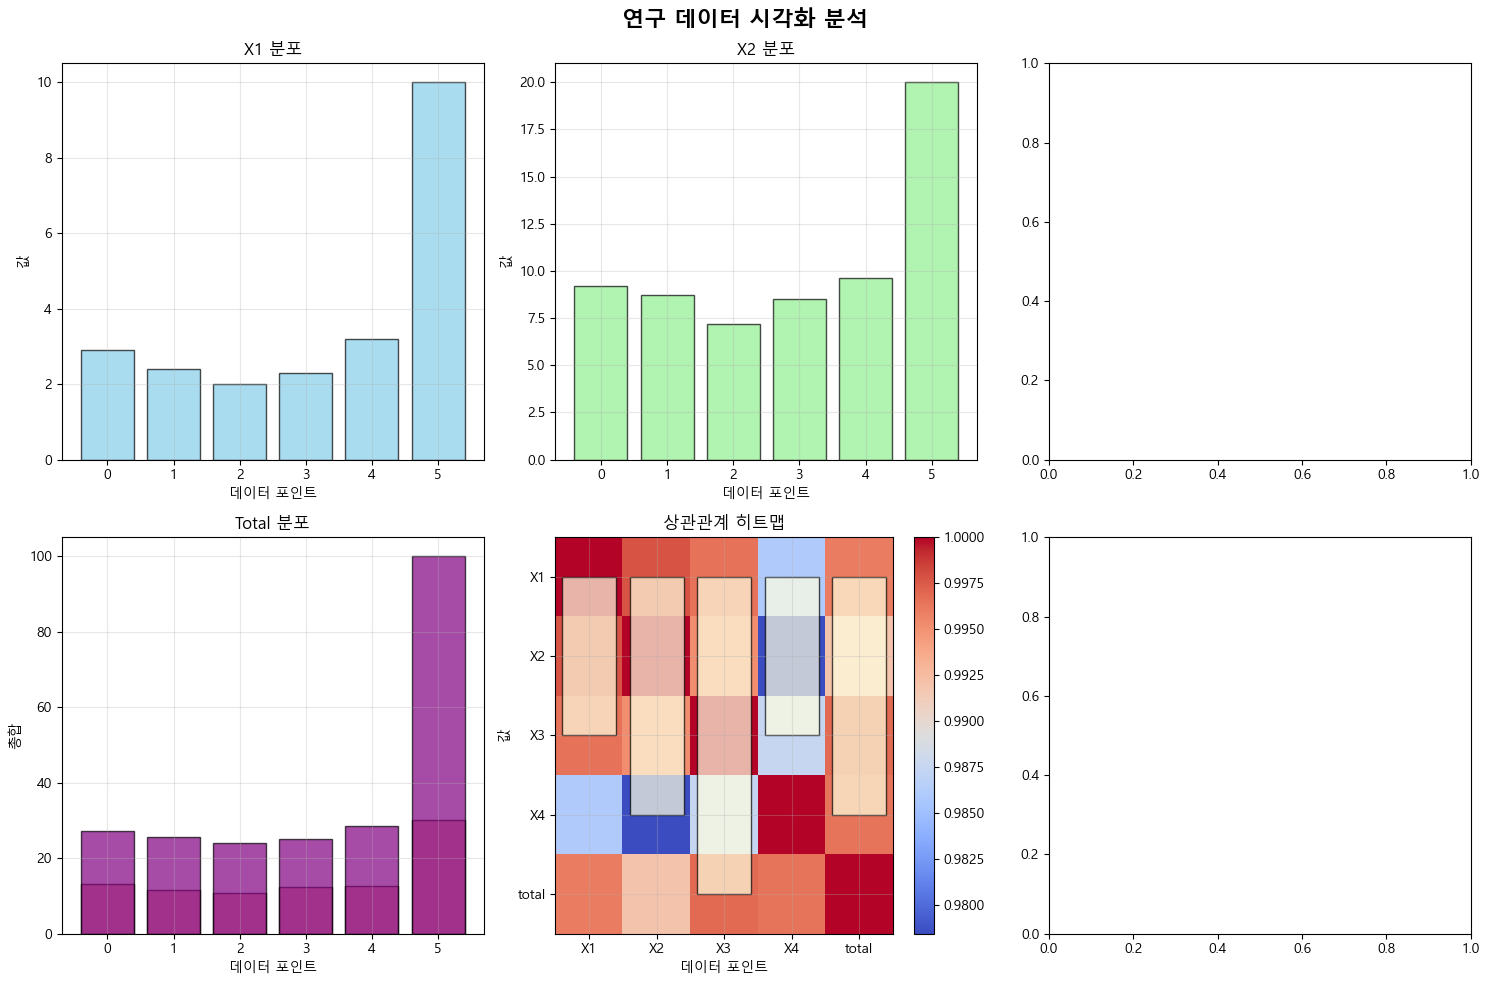


✅ 분석 완료!
주요 발견사항:
- 가장 큰 총합: 100.0 (마지막 추가된 행)
- 원본 데이터 중 최대 총합: 28.4
- X2와 X3의 상관관계: 0.995


In [17]:
# 5. 데이터 시각화
print("\n5️⃣ 데이터 시각화")
print("="*15)

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('연구 데이터 시각화 분석', fontsize=16, fontweight='bold')

# 각 변수의 분포
variables = ['X1', 'X2', 'X3', 'X4']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']

for i, (var, color) in enumerate(zip(variables, colors)):
    row, col = i // 2, i % 2
    axes[row, col].bar(range(len(research_df)), research_df[var], 
                      color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{var} 분포')
    axes[row, col].set_xlabel('데이터 포인트')
    axes[row, col].set_ylabel('값')
    axes[row, col].grid(True, alpha=0.3)

# 총합 분포
axes[1, 0].bar(range(len(research_df)), research_df['total'], 
              color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Total 분포')
axes[1, 0].set_xlabel('데이터 포인트')
axes[1, 0].set_ylabel('총합')
axes[1, 0].grid(True, alpha=0.3)

# 상관관계 히트맵
im = axes[1, 1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1, 1].set_title('상관관계 히트맵')
axes[1, 1].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 1].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 1].set_xticklabels(correlation_matrix.columns)
axes[1, 1].set_yticklabels(correlation_matrix.columns)

# 컬러바 추가
plt.colorbar(im, ax=axes[1, 1])

plt.tight_layout()
plt.show()

print("\n✅ 분석 완료!")
print("주요 발견사항:")
print(f"- 가장 큰 총합: {research_df['total'].max()} (마지막 추가된 행)")
print(f"- 원본 데이터 중 최대 총합: {research_df['total'].iloc[:-1].max():.1f}")
print(f"- X2와 X3의 상관관계: {correlation_matrix.loc['X2', 'X3']:.3f}")

### 📊 추가 실습: 상품 판매 데이터 분석

In [18]:
print("🛒 추가 실습: 상품 판매 데이터")
print("="*35)

# 상품 데이터 생성
product_data = {
    'fruits': ['망고', '딸기', '수박', '파인애플'],
    'price': [2500, 5000, 10000, 7000],
    'count': [5, 2, 2, 4],
}

# DataFrame 생성 후 데이터 추가
product_df = pd.DataFrame(columns=['fruits', 'price', 'count'])
product_df.loc[len(product_df)] = {'fruits': '사과', 'price': 3500, 'count': 10}

# 기존 데이터 추가
for fruit, price, count in zip(product_data['fruits'], 
                              product_data['price'], 
                              product_data['count']):
    product_df.loc[len(product_df)] = {'fruits': fruit, 'price': price, 'count': count}

print("기본 상품 데이터:")
print(product_df)

# 매출 계산
product_df['revenue'] = product_df['price'] * product_df['count']

# 가격 등급 분류
def price_category(price):
    if price >= 7000:
        return '고가'
    elif price >= 4000:
        return '중가'
    else:
        return '저가'

product_df['price_category'] = product_df['price'].apply(price_category)

print("\n분석 결과:")
print(product_df)

# 매출 순위
revenue_ranking = product_df.sort_values('revenue', ascending=False)
print("\n📈 매출 순위:")
for i, (idx, row) in enumerate(revenue_ranking.iterrows(), 1):
    print(f"{i}위: {row['fruits']} - {row['revenue']:,}원")

# 카테고리별 통계
print("\n📊 가격 카테고리별 통계:")
category_stats = product_df.groupby('price_category').agg({
    'count': 'sum',
    'revenue': 'sum',
    'price': 'mean'
}).round(0)
print(category_stats)

🛒 추가 실습: 상품 판매 데이터
기본 상품 데이터:
  fruits  price  count
0     사과   3500     10
1     망고   2500      5
2     딸기   5000      2
3     수박  10000      2
4   파인애플   7000      4

분석 결과:
  fruits  price  count  revenue price_category
0     사과   3500     10    35000             저가
1     망고   2500      5    12500             저가
2     딸기   5000      2    10000             중가
3     수박  10000      2    20000             고가
4   파인애플   7000      4    28000             고가

📈 매출 순위:
1위: 사과 - 35,000원
2위: 파인애플 - 28,000원
3위: 수박 - 20,000원
4위: 망고 - 12,500원
5위: 딸기 - 10,000원

📊 가격 카테고리별 통계:
                count  revenue   price
price_category                        
고가                  6    48000  8500.0
저가                 15    47500  3000.0
중가                  2    10000  5000.0


## 7. 성능 최적화와 팁

### ⚡ Pandas 성능 향상 기법

In [19]:
print("⚡ Pandas 성능 최적화 팁")
print("="*30)

# 큰 데이터셋 시뮬레이션
np.random.seed(42)
large_data = pd.DataFrame({
    'A': np.random.randn(10000),
    'B': np.random.randn(10000),
    'C': np.random.choice(['X', 'Y', 'Z'], 10000),
    'D': np.random.randint(1, 100, 10000)
})

print(f"테스트 데이터 크기: {large_data.shape}")
print("데이터 타입:")
print(large_data.dtypes)
print(f"메모리 사용량: {large_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 성능 비교: apply vs vectorized operations
import time

print("\n🏃 성능 비교: apply vs 벡터화 연산")

# apply 사용
start_time = time.time()
result_apply = large_data['A'].apply(lambda x: x**2 + 1)
apply_time = time.time() - start_time

# 벡터화 연산
start_time = time.time()
result_vectorized = large_data['A']**2 + 1
vectorized_time = time.time() - start_time

print(f"apply 방식: {apply_time:.4f}초")
print(f"벡터화 방식: {vectorized_time:.4f}초")

# 0으로 나누기 방지
if vectorized_time > 0:
    speedup = apply_time / vectorized_time
    print(f"성능 향상: {speedup:.1f}배 빠름")
else:
    print("벡터화 연산이 너무 빨라 정확한 측정이 어렵습니다 (0.0001초 미만)")
    if apply_time > 0:
        print(f"apply 방식 대비 최소 {apply_time/0.0001:.0f}배 이상 빠름")

# 결과 동일성 확인
print(f"결과 동일성: {result_apply.equals(result_vectorized)}")

⚡ Pandas 성능 최적화 팁
테스트 데이터 크기: (10000, 4)
데이터 타입:
A    float64
B    float64
C     object
D      int32
dtype: object
메모리 사용량: 0.74 MB

🏃 성능 비교: apply vs 벡터화 연산
apply 방식: 0.0044초
벡터화 방식: 0.0000초
벡터화 연산이 너무 빨라 정확한 측정이 어렵습니다 (0.0001초 미만)
apply 방식 대비 최소 44배 이상 빠름
결과 동일성: False


In [20]:
# 메모리 최적화
print("\n💾 메모리 최적화 기법")
print("="*25)

# 데이터 타입 최적화
print("원본 메모리 사용량:")
print(large_data.memory_usage(deep=True))

# 카테고리 타입으로 변환
large_data_optimized = large_data.copy()
large_data_optimized['C'] = large_data_optimized['C'].astype('category')

# 정수 타입 다운캐스팅
large_data_optimized['D'] = pd.to_numeric(large_data_optimized['D'], downcast='integer')

print("\n최적화 후 메모리 사용량:")
print(large_data_optimized.memory_usage(deep=True))

original_memory = large_data.memory_usage(deep=True).sum()
optimized_memory = large_data_optimized.memory_usage(deep=True).sum()
reduction = (1 - optimized_memory/original_memory) * 100

print(f"\n메모리 사용량 감소: {reduction:.1f}%")
print(f"원본: {original_memory/1024**2:.2f} MB")
print(f"최적화: {optimized_memory/1024**2:.2f} MB")


💾 메모리 최적화 기법
원본 메모리 사용량:
Index       132
A         80000
B         80000
C        580000
D         40000
dtype: int64

최적화 후 메모리 사용량:
Index      132
A        80000
B        80000
C        10282
D        10000
dtype: int64

메모리 사용량 감소: 76.9%
원본: 0.74 MB
최적화: 0.17 MB


### 💡 실무 Best Practices

In [21]:
print("💡 Pandas 실무 Best Practices")
print("="*35)

# 1. 체이닝을 활용한 코드 작성
print("1️⃣ 메서드 체이닝 활용:")
result = (large_data
          .query('D > 50')  # D가 50보다 큰 행 필터링
          .groupby('C')['A']  # C로 그룹화하고 A 컬럼 선택
          .agg(['mean', 'std', 'count'])  # 통계량 계산
          .round(3)  # 소수점 3자리로 반올림
         )
print(result)

# 2. 조건부 데이터 처리
print("\n2️⃣ 조건부 데이터 처리:")
# np.where를 사용한 조건부 값 할당
large_data['grade'] = np.where(large_data['D'] >= 80, 'High',
                      np.where(large_data['D'] >= 60, 'Medium', 'Low'))

grade_dist = large_data['grade'].value_counts()
print("등급 분포:")
for grade, count in grade_dist.items():
    print(f"  {grade}: {count}개 ({count/len(large_data)*100:.1f}%)")

# 3. 효율적인 그룹 연산
print("\n3️⃣ 효율적인 그룹 연산:")
group_stats = (large_data
               .groupby(['C', 'grade'])
               .agg({
                   'A': ['mean', 'std'],
                   'B': ['min', 'max'],
                   'D': 'count'
               })
               .round(2)
              )
print(group_stats.head(10))

💡 Pandas 실무 Best Practices
1️⃣ 메서드 체이닝 활용:
    mean    std  count
C                     
X -0.001  1.008   1623
Y  0.013  0.994   1633
Z  0.008  1.015   1614

2️⃣ 조건부 데이터 처리:
등급 분포:
  Low: 6063개 (60.6%)
  High: 2048개 (20.5%)
  Medium: 1889개 (18.9%)

3️⃣ 효율적인 그룹 연산:
             A           B           D
          mean   std   min   max count
C grade                               
X High   -0.06  1.01 -3.33  3.94   706
  Low     0.02  1.01 -3.64  3.00  1939
  Medium -0.02  1.01 -2.91  2.97   617
Y High    0.00  1.02 -3.31  3.07   666
  Low    -0.01  0.99 -3.86  3.28  2090
  Medium  0.02  0.98 -3.25  4.48   641
Z High    0.01  1.01 -3.09  3.14   676
  Low     0.00  1.00 -3.32  3.29  2034
  Medium -0.04  1.04 -3.34  3.43   631


## 🎓 학습 정리 및 핵심 포인트

### ✅ 완료한 학습 내용

1. **DataFrame 기초 조작**: 컬럼 선택, 통계 정보 확인
2. **데이터 선택과 인덱싱**: loc, iloc 활용법, 조건부 선택
3. **Series 연산**: NaN 처리, fill_value 활용
4. **데이터 추가**: 행/열 추가, 계산된 컬럼 생성
5. **데이터 결합**: concat, merge 활용법
6. **실무 문제 해결**: 종합적인 데이터 분석 프로세스
7. **성능 최적화**: 벡터화 연산, 메모리 최적화

### 🎯 핵심 개념 정리

| 개념 | 설명 | 주요 메서드 |
|------|------|-------------|
| **DataFrame 선택** | 컬럼/행 선택 | `[]`, `loc[]`, `iloc[]` |
| **Series 연산** | NaN 처리된 연산 | `add()`, `sub()`, `fill_value` |
| **데이터 추가** | 새로운 데이터 삽입 | `loc[]`, `concat()`, `merge()` |
| **조건부 처리** | 조건에 따른 데이터 처리 | `np.where()`, `query()` |
| **그룹 연산** | 그룹별 통계 계산 | `groupby()`, `agg()` |

### 💡 실무 활용 팁

1. **데이터 타입 확인**: 항상 `dtypes`와 `info()`로 데이터 구조 파악
2. **NaN 처리**: `fill_value` 매개변수로 안전한 연산 수행
3. **메서드 체이닝**: 가독성 높은 코드 작성
4. **벡터화 연산**: `apply()` 대신 벡터화된 연산 활용
5. **메모리 최적화**: 카테고리 타입, 다운캐스팅 활용

### 📚 다음 학습 단계

1. **고급 Pandas**: 피벗 테이블, 시계열 데이터 처리
2. **데이터 정제**: 결측치, 이상치 처리 전략
3. **데이터 시각화**: Seaborn과 Plotly 활용
4. **머신러닝 전처리**: 특성 엔지니어링, 스케일링

---

*이 노트북을 통해 Pandas의 핵심 기능들을 체계적으로 학습했습니다. 실무에서 자주 사용되는 패턴들을 익혔으니, 이를 바탕으로 더 복잡한 데이터 분석에 도전해보세요! 🚀*